<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

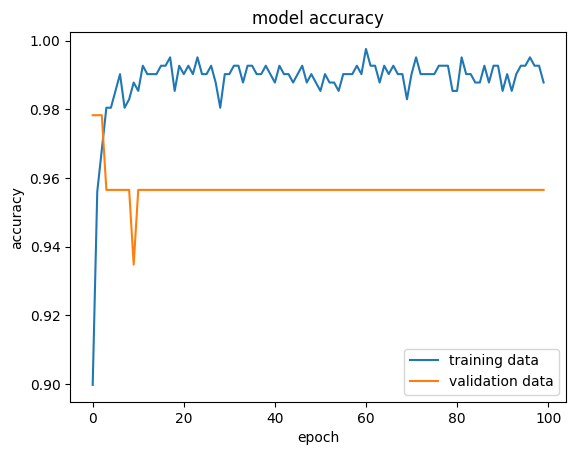

In [ ]:
import numpy as np                     # import numpy arrays and do math
import pandas as pd                    # imports pandas library to process and visualize data better with tables
import matplotlib.pyplot as plt          # visualize the training for machine learning/AI
import sklearn.datasets                  # adds additional data sets for training/testing
from sklearn.datasets import load_breast_cancer            # import training and test data from sklearn.datasets
from sklearn.model_selection import train_test_split       # to split data into training data
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


breast_cancer_dataset = load_breast_cancer()
# can use print(breast_cancer_data_set) to check

# loading data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)


# adding the "target" column to the data frame (this last column has 0 or 1 label for tumor type)
# 1 = Benign, 0 = Malignant
data_frame['label'] = breast_cancer_dataset.target

# to print last 5 rows of the dataframe to check if the label was added in the last row
# print(data_frame.tail())

# check the number of rows and columns in the dataset (# of columns = # of patients)
#print(data_frame.shape)

# getting some info about the data to see if we have all the necessary data types/values
# non-null means there are no values are missing/empty
print(data_frame.info())

# another way to check for missing values is
# print(data_frame.isnull().sum())
# 0 means no values are missing


# code below gives statistical measurements about the data (count, mean, std deviation, percentile means, min, max)
# print(data_frame.describe())


# to check how many values are present for benign and malignant tumors (1 = Benign, 0 = Malignant)
print(data_frame['label'].value_counts())

# print the mean for each data point/measurement (the column) by label (0 and 1)
# print(data_frame.groupby('label').mean())

# at this point, the label and the measurements/features are in the same list/graph
# lets separate the two so we can work with them independently
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']
print(X)
print(Y)

# We split the data into training data and Testing data
# test_size=0.2 means that 20% of the data will be dedicated to testing, with 80% going to training
# random_state is used as a seed for the random number generator.
# Different seeds produce different sequences of random numbers, leading to different splits.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# with this code we can check the distribution of the test and training data
# (total, training data, testing data)
print(X.shape, X_train.shape, X_test.shape)

# standardize the data
scalar = StandardScaler()
X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.transform(X_test)

# Now we will start working on the Neural Network
# input layer = 1 layer, output layer = 1 layer, hidden layer may have several layers
# import tensorflow and keras
# TensorFlow is the deep learning library developed by Google
tf.random.set_seed(3)         # works similar to random_state to randomize


# Setting up the layers of the Neural Network
# Defining the model:
model = Sequential([
    Input(shape=(30,)),
    Dense(128, activation='relu'),    # Hidden/Dense layer with 128 neurons to learn from the provided data
    Dropout(0.3),                     # Dropout layer between dense layers to randomly deactivate neurons during training, which prevents overfitting and increases generalization
    Dense(64, activation='relu'),     # With 2 dense/hidden layers in a neural network, each layer will perform transformations on  input and pass the result to the next layer. They together to learn complex features of the data through a series of transformations.
    Dropout(0.3),
    Dense(2, activation='softmax')    # Output layer that gives 0 or 1 (Malignant or Benign)
])



# compiling the neural network
# Sets up the model training process with appropriate optimization and performance metrics.

# Adam is used to adjust the weights of the neural network to minimize the loss function. It applies adaptive learning rates for each weight, which helps improve convergence by focusing on weights that need adjustments the most.
# sparse_categorical_crossentropy is used here for multi-class classification tasks, where the labels are provided as sparse integers (e.g., 0, 1, 2, etc.).
# Metrics=['accuracy'] is used as the evaluation metric to assess how well the model performs during training and testing.
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ReduceLROnPlateau used to dynamically adjust the learning rate during training.
# Monitors the validation loss, and when it plateaus or starts increasing, dynamically reduces the learning rate to help the model converge better. This prevents overfitting and helps the model train for a more optimal number of epochs.
# Monitor: Specifies the metric to be monitored, which is val_loss in this case.
# Factor: Defines the factor by which the learning rate will be reduced when the monitored metric stops improving (e.g., if val_loss does not improve, the learning rate will be reduced by 50%).
# Patience: Specifies the number of epochs with no improvement after which the learning rate will be reduced.
# Verbose: Provides more detailed output during training when certain events occur (e.g., when learning rate is reduced).#
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)




# training our neural network

# X_train = features, Y_train = labels, Epoch = how many times the model has to go through the data
# validation_split= specifies the fraction of the training data to be set aside for validation.

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=100, batch_size=16, callbacks=[reduce_lr])



# lets visualize the accuracy using a graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.1145 
Test Accuracy: 0.96, Test Loss: 0.13
(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(114, 2)
[0.03979863 0.9602013 ]
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


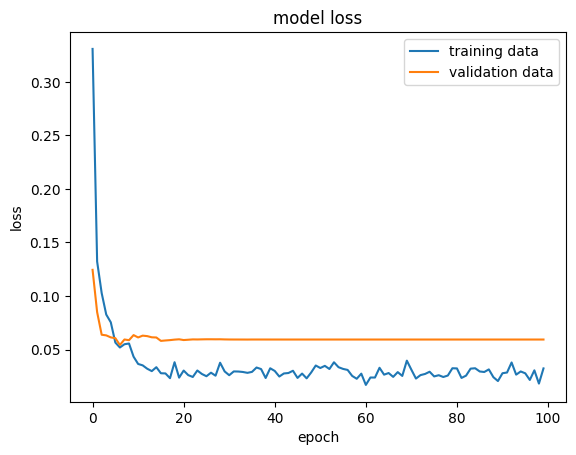

In [ ]:
# now we visualize the loss
# In machine learning and specifically in neural networks, loss refers to a function that measures how well the model's predictions match the actual labels or ground truth values. It quantifies the difference between the predicted outputs and the true outputs.
# In summary, loss quantifies the error in predictions, guiding the model to minimize it through training optimizations like backpropagation.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='upper right')



# accuracy of the model on the test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f"Test Accuracy: {accuracy:.2f}, Test Loss: {loss:.2f}")


print(X_test_std.shape)
print(X_test_std[0])

Y_pred = model.predict(X_test_std)
print(Y_pred.shape)
print(Y_pred[0])

# model.predict() gives the prediction probability of each class for that data point
# converting the prediction probability to class label (0 or 1)
# np.argmax gives the INDEX of the max value in the respective list

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

In [ ]:
# Creating an input() so we can feed it our own tumor data and have it make predictions on benign vs malignant

# Building the prediction system and change it to a numpy array
input_data = ()
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data again
input_data_std = scalar.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1.00000e+00 6.37604e-14]]
[0]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
